In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [17]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [67]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [100]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [101]:
def Adagrad_norm(x0, func, grad_i, step, bj, nu):
    xk = x0.copy()
    res = [func(xk)]
    n = 28
    for k in range(step):
        ex = np.random.randint(1, 300)
        now_gr = grad_i(xk, ex)
        bj += np.linalg.norm(now_gr)**2
        xk -= nu / bj**0.5 * now_gr
        res.append(func(xk))
    return xk, res    

In [112]:
def SGD(x0, func, grad_i, step, nu):
    xk = x0.copy()
    res = [func(xk)]
    n = 28
    for k in range(step):
        ex = np.random.randint(1, 300)
        now_gr = grad_i(xk, ex)
        xk -= nu * now_gr
        res.append(func(xk))
    return xk, res    

In [135]:
def sgd(x0, grad, steps, func, L):
    res = [func(x0)]
    x = x0
    x_avg = x0
    for j in range(1, steps):
        i = np.random.randint(300)
        h = 1 / L
        gfx = grad(x, i)
        x = x - h * gfx
        x_avg = (x_avg * j + x) / (j + 1)
        res.append(func(x))
    return x, res

In [204]:
xk, res1 = SGD(x0, func, grad_i, 100000, 1/L)
#xk, res2 = sgd(x0, grad_i, 40000, func, L)

In [217]:
xk, res = Adagrad_norm(x0, func, grad_i, 100000, 0, 0.8)

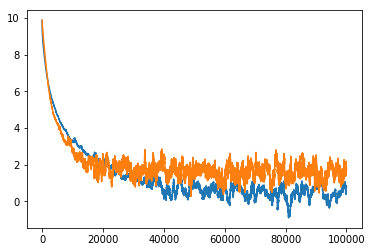

In [218]:
plt.plot(np.log(np.array(res) - 373.4040155581676))
plt.plot(np.log(np.array(res1) - 373.4040155581676))
#plt.plot(np.log(np.array(res2) - 373.4040155581676))
plt.show()

In [219]:
print(min(res))
print(min(res1))
print(min(res2))

373.80952041267483
374.72135938090224
376.65896658906433
